# <font color='red'>Week 1 </font>

### Поиск подстроки в строке

In [1]:
def counter(text, stroka):
    count = 0
    for i in range(len(text) - len(stroka) + 1):
        if stroka == text[i:i + len(stroka)]:
            count += 1
    return count

In [2]:
def file_reader(filename):
    with open(filename, 'r') as f:
        return list(map(lambda x: x.rstrip(), f.readlines()))

In [3]:
text, stroka = file_reader('dataset_240214_6.txt')
count = counter(text, stroka)
print(f'Число вхождений GCG в данную строку = {count}')

Число вхождений GCG в данную строку = 21


### Поиск наиболее встречающейся подстроки

In [4]:
import operator
def FrequentWords(text, k):
    kfolds = {}
    for i in range(len(text) - k):
        if  not text[i:i + k] in kfolds:
            kfolds[text[i:i + k]] = counter(text, text[i:i + k])
    items = kfolds.items()
    kfolds = sorted(items, key=operator.itemgetter(1), reverse=True)
    return ' '.join(kfolds[i][0] for i in range(len(kfolds)) if kfolds[i][1] == kfolds[0][1])

In [5]:
text, k = file_reader('dataset_240214_13.txt')
print(FrequentWords(text, int(k)))

CGGTGTCGCGGT GGTGTCGCGGTG GTGTCGCGGTGT TGTCGCGGTGTC GTCGCGGTGTCG


In [6]:
FrequentWords('CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCT', 3)

'CCT'

### Замена на комплементарную цепочку

In [62]:
def complimentary(chain):
    tlt = {
        'A': 'T',
        'T': 'A',
        'C': 'G',
        'G': 'C'
    }
    s = ''
    for sim in chain:
        s = tlt[sim] + s
    return s

In [8]:
st = 'GCTAGCT'
st = st.replace('A', 't').replace('T', 'a').replace('C', 'g').replace('G', 'c').upper()[::-1]
print(st)

AGCTAGC


### Поиск всех вхождений подстроки в строку

In [9]:
def patternMatching(pattern, genome):
    index_list = []
    for i in range(len(genome) - len(pattern) + 1):
        if pattern == genome[i:i + len(pattern)]:
            index_list.append(i)
    return index_list   

In [10]:
pattern, genome = file_reader('dataset_3_5.txt')

In [11]:
print(' '.join(list(map(str, patternMatching(pattern, genome)))))

36 157 212 219 253 277 307 378 385 401 408 424 440 470 477 484 611 641 675 692 716 737 782 797 804 815 822 859 942 949 1030 1067 1085 1100 1173 1221 1237 1261 1369 1456 1466 1560 1577 1658 1686 1711 1794 1821 1837 1968 2023 2075 2142 2167 2261 2287 2300 2344 2381 2446 2453 2499 2547 2562 2607 2614 2621 2628 2649 2686 2701 2716 2725 2747 2754 2763 2809 2835 2900 3037 3078 3085 3140 3173 3180 3187 3203 3254 3417 3451 3499 3506 3559 3585 3592 3626 3641 3669 3676 3782 3817 3840 3897 3914 3932 3947 4036 4043 4059 4093 4164 4171 4178 4185 4236 4330 4381 4424 4465 4500 4525 4532 4580 4587 4598 4616 4683 4762 4785 4817 4897 4922 5015 5022 5053 5095 5184 5238 5263 5292 5307 5324 5373 5431 5447 5482 5605 5635 5660 5722 5739 5746 5753 5787 5806 5890 5916 5976 5986 6282 6337 6352 6380 6398 6407 6436 6443 6461 6468 6529 6542 6557 6593 6600 6628 6732 6764 6792 6807 6814 6858 6999 7014 7038 7073 7080 7087 7094 7185 7218 7225 7265 7280 7355 7364 7392 7468 7530 7594 7601 7666 7673 7680 7736 7743 7750 7

### <font color='purple'>*Vibrio cholerae genome</font>

Return a space-separated list of starting positions (in increasing order) where **CTTGATCAT** appears as a substring in the Vibrio cholerae genome.

In [12]:
with open('Vibrio_cholerae.txt', 'r') as f:
    genome = f.read()
    pattern = 'CTTGATCAT'
print(' '.join(list(map(str, patternMatching(pattern, genome)))))

60039 98409 129189 152283 152354 152411 163207 197028 200160 357976 376771 392723 532935 600085 622755 1065555


### Функция Number -> Pattern
Перевод из **10-ой -> 4-ую** систему счисления. Реализация функции:

**Compute NumberToPattern(5437, 7)**

In [13]:
def NumberToPattern(num, k):
    slovar = {0: "A", 1: "C", 2: "G", 3: "T"}
    pattern = ''
    while num > 3:
        pattern += slovar[num % 4]
        num = num // 4
        if num < 4:
            pattern += slovar[num]
    return 'A' * (k - len(pattern)) + pattern[::-1]

In [14]:
NumberToPattern(11, 3)

'AGT'

In [15]:
with open('dataset_3010_5.txt', 'r') as f:
    num = int(f.readline().rstrip())
    k = int(f.readline().rstrip())
NumberToPattern(num, k)

'AACTGGAGA'

### PatternToNumber

In [16]:
def PatternToNumber(pattern):
    num = 0
    dic = {"A": 0, "C": 1, "G": 2, "T": 3}
    for i in range(len(pattern)):
        num += dic[pattern[i]] * 4 ** (len(pattern) - i - 1)
    return num

In [17]:
with open('dataset_3010_2.txt', 'r') as f:
    pattern = f.read().rstrip()
PatternToNumber(pattern)

12469371605

### The Frequency Array

In [18]:
def ComputingFrequencies(Text, k):
    arr = [0] * (4 ** k)
    for i in range(len(Text) - k + 1):
        arr[PatternToNumber(Text[i:i+k])] += 1
    return arr

In [19]:
ComputingFrequencies('CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCT', 3)

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0]

In [20]:
with open('dataset_2994_5.txt', 'r') as f:
    text = f.readline().rstrip()
    k = int(f.readline().rstrip())
print(' '.join(list(map(str, ComputingFrequencies(text, k)))))

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 

### Faster FrequentWords

In [21]:
def FasterFrequentWords(Text, k):
    arr = []
    freq_arr = ComputingFrequencies(Text, k)
    maxik = max(freq_arr)
    for i in range(len(freq_arr)):
        if freq_arr[i] == maxik:
            arr.append(NumberToPattern(i, k))
    return arr

In [22]:
text, k = file_reader('dataset_240214_13.txt')
print(FasterFrequentWords(text, int(k)))

['CGGTGTCGCGGT', 'GGTGTCGCGGTG', 'GTCGCGGTGTCG', 'GTGTCGCGGTGT', 'TGTCGCGGTGTC']


### ClumpFinding (slow)

The pseudocode below slides a window of length L down Genome. After computing the frequency array for the current window, it identifies (L, t)-clumps simply by finding which k-mers occur at least t times within the window. To keep track of these clumps, our algorithm uses an array Clump of length 4k whose values are all initialized to zero. For each value of i between 0 and 4k − 1, we will set Clump(i) equal to 1 if NumberToPattern(i, k) forms an (L, t)-clump in Genome.

'''
    ClumpFinding(Genome, k, L, t)
        FrequentPatterns ← an empty set
        for i ← 0 to 4k − 1
            Clump(i) ← 0
        for i ← 0 to |Genome| − L
            Text ← the string of length L starting at position i in Genome 
            FrequencyArray ← ComputingFrequencies(Text, k)
            for index ← 0 to 4k − 1
                if FrequencyArray(index) ≥ t
                    Clump(index) ← 1
        for i ← 0 to 4k − 1
            if Clump(i) = 1
                Pattern ← NumberToPattern(i, k)
                add Pattern to the set FrequentPatterns
        return FrequentPatterns
'''

In [23]:
def ClumpFinding(Genome, k, L, t):
    FrequentPatterns = set()
    Clump = [0] * 4 ** k
    for i in range(len(Genome) - L):
        Text = Genome[i:i + L]
        FrequencyArray = ComputingFrequencies(Text, k)
        for j in range(len(Clump)):
            if FrequencyArray[j] >= t:
                Clump[j] = 1
    for i in range(len(Clump)):
        if Clump[i] == 1:
            Pattern = NumberToPattern(i, k)
            FrequentPatterns.add(Pattern)
    return FrequentPatterns

In [24]:
Genome = 'CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'
k = 5
L = 50
t = 4
ClumpFinding(Genome, k, L, t)

{'CGACA', 'GAAGA'}

In [25]:
filename = 'dataset_4_5.txt'
with open(filename, 'r') as f:
    Genome, line = [x.strip() for x in f.readlines()]
    k, L, t = map(int, line.split(' '))
ClumpFinding(Genome, k, L, t)

{'TGGGTAGAC'}

# <font color='red'>Week 2 </font>

## Minimum Skew Problem:

Find a position in a genome minimizing the skew.

     Input: A DNA string Genome.
     Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).


---
**Sample Input:**

TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT

---
**Sample Output:**

11 24


In [26]:
def MinimumSkew(Genome):
    num = [0]
    mins = []
    minim = 0
    for i in range(len(Genome)):
        if Genome[i] == 'G':
            num.append(num[i] + 1)
            if (i > 0) and (num[i - 1] > num[i]) and (num[i + 1] > num[i]):
                if minim == 0 or num[i] < num[minim]:
                    minim = i
                    mins = [i]
                elif num[i] == num[minim]:
                    mins.append(i)
        elif Genome[i] == 'C':
            num.append(num[i] - 1)
        else:
            num.append(num[i])
    return num, mins

In [94]:
Genome = 'CATTCCAGTACTTCGATGATGGCGTGAAGA'
num, mins = MinimumSkew(Genome)
print(mins)

[14]


In [28]:
with open('dataset_7_6.txt', 'r') as f:
    Genome = f.read().strip()

In [29]:
num, mins = MinimumSkew(Genome)
print(' '.join(map(str, mins)))

54680


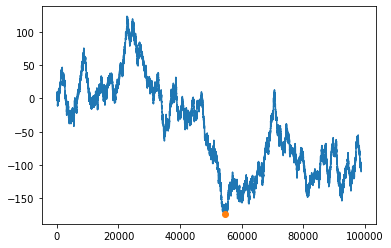

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(len(num)), num,'-', mins, [num[x] for x in mins],  'o')

## Hamming Distance Problem

Compute the Hamming distance between two strings.

     Input: Two strings of equal length.
     Output: The Hamming distance between these strings.
     
---

**Sample Input:**

GGGCCGTTGGT
GGACCGTTGAC

---
**Sample Output:**

3

In [31]:
def HammingDistance(p, q):
    num = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            num += 1
    return num

In [93]:
p = 'CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT'
q = 'CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG'
HammingDistance(p, q)

36

In [33]:
with open('dataset_9_3.txt', 'r') as f:
    p = f.readline().strip()
    q = f.readline().strip()
HammingDistance(p, q)

760

## Approximate Pattern Matching Problem

Find all approximate occurrences of a pattern in a string.

     Input: Strings Pattern and Text along with an integer d.
     Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.
     
---

**Sample Input:**

ATTCTGGA

CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT

3

---

**Sample Output:**

6 7 26 27

In [34]:
def ApproximatePatternMatching(Text, Pattern, d):
    positions = []
    for i in range(len(Text) - len(Pattern) + 1):
        if HammingDistance(Text[i:i + len(Pattern)], Pattern) <= d:
            positions.append(i)
    return positions

In [35]:
Text = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'
Pattern = 'ATTCTGGA'
d = 3
ApproximatePatternMatching(Text, Pattern, d)

[6, 7, 26, 27]

In [36]:
with open('dataset_9_4.txt', 'r') as f:
    Pattern = f.readline().strip()
    Text = f.readline().strip()
    d = int(f.readline().strip())
print(' '.join(map(str, ApproximatePatternMatching(Text, Pattern, d))))

6 33 56 57 126 178 185 192 204 213 220 223 227 231 251 281 365 370 402 450 470 513 535 560 577 588 615 630 693 714 732 752 773 813 830 852 880 884 937 961 1005 1029 1037 1062 1077 1083 1134 1136 1152 1163 1173 1186 1209 1239 1265 1300 1317 1372 1388 1406 1415 1455 1472 1496 1504 1542 1571 1585 1587 1612 1622 1668 1672 1679 1687 1700 1705 1722 1724 1761 1804 1808 1938 1946 2005 2016 2024 2047 2068 2091 2098 2104 2134 2162 2171 2181 2208 2219 2244 2252 2271 2275 2289 2321 2337 2363 2377 2386 2423 2427 2431 2450 2475 2500 2505 2517 2547 2558 2578 2599 2606 2620 2627 2636 2648 2683 2707 2710 2717 2726 2751 2791 2836 2864 2888 2997 3017 3090 3099 3104 3113 3126 3154 3163 3170 3174 3181 3182 3215 3218 3223 3235 3269 3281 3295 3312 3395 3399 3403 3413 3454 3517 3611 3664 3682 3699 3704 3759 3797 3804 3808 3840 3850 3920 3925 3937 3948 3955 3965 3979 3992 4015 4043 4048 4073 4080 4120 4137 4142 4184 4242 4246 4329 4353 4373 4401 4408 4429 4436 4482 4486 4498 4500 4504 4507 4590 4602 4626 4650 

## ApproximatePatternCount:

**Sample Input:**

GAGG

TTTAGAGCCTTCAGAGG

2

---
**Sample Output:**

4

In [37]:
def ApproximatePatternCount(Text, Pattern, d):
    count = 0
    for i in range(len(Text) - len(Pattern) + 1):
        if HammingDistance(Text[i:i + len(Pattern)], Pattern) <= d:
            count += 1
    return count

In [95]:
Text = 'CATGCCATTCGCATTGTCCCAGTGA'
Pattern = 'CCC'
d = 2
ApproximatePatternCount(Text, Pattern, d)

15

In [39]:
with open('dataset_9_6.txt', 'r') as f:
    Pattern = f.readline().strip()
    Text = f.readline().strip()
    d = int(f.readline().strip())
ApproximatePatternCount(Text, Pattern, d)

145

### <font color='purple'>Neighbors </font>

Implement **Neighbors** to find the d-neighborhood of a string.

     Input: A string Pattern and an integer d.
     Output: The collection of strings Neighbors(Pattern, d).
---

**Sample Input:**

ACG

1

**Sample Output:**

AAG
ACG
CCG
AGG
ACT
GCG
ATG
ACC
TCG
ACA

In [40]:
def Neighbors(Pattern, d):
    if d == 0:
        return {Pattern}
    if len(Pattern) == 1:
        return {'A', 'C', 'G', 'T'}
    Neighborhood = set()
    suff = Pattern[1:]
    SuffixNeighbors = Neighbors(suff, d)
    for neib in SuffixNeighbors:
        if HammingDistance(neib, suff) < d:
            for x in ['A', 'C', 'G', 'T']:
                Neighborhood.add(x + neib)
        else:
            Neighborhood.add(Pattern[0] + neib)
    return list(Neighborhood)

In [97]:
Pattern = 'CCAGTCAATG'
d = 1
len(Neighbors(Pattern, d))

31

In [42]:
with open('dataset_3014_4.txt', 'r') as f:
    Pattern = f.readline().strip()
    d = int(f.readline().strip())
print(' '.join(Neighbors(Pattern, d)))

TTGTCCGG TGATTAAA TGGAAAGA TAGTGTGA CGGTGCGT TGGATGGG AGGGTTGA GGGTTCCC TAGATTGA TGATTTGA TCATTAGA TAATTCGT TGAGGCGA TGGAACGC TGCTACTA CAGTTAGA AGGATTGA GGGACCGA TTTTTCCA TGCTTCCC TAGAGCGA TCTTTCGG TAGACCGA TGGTTGAC TGATTTGT CAGATCGA TGATGCGT TCGTTAGA TGGTTGGG TGGCGCCA TCGTTCCG TAGCTCTA GGGTTCCA TAATTAGA TGGTCGGC CGGTTCCC TGGGACGT GGGAACGA AGGCTCCA TTGGTCAA CCGTTCGT TGGTTCTT ATATTCGA TGTCTAGA CAGTTGGA CGGTACGC TGGAGCCA CGTTCCGA TCGTCCGC TGCCTCGA TTGCTCTA GGGTTAGT TAATTCGC TCGTGAGA AGGTTCCT TGATTCTC TGTATCGC CGGTTCGA ATGTTCTA CATTTCGA GGGTGCTA TATTGCGA TCTATCGA CTGTTTGA TAGTGCCA TCGTTCTC TCGATGGA TTGACCGA TGCGTCTA TCGATCGT TGGTCCGT TGGTGAGA TGGCGCGA TGGGATGA TTGATGGA TCGTCCTA GGGTTCAC TCGTTTGG TGCGTCGC TTGAACGA CGCTTCGT TGCTTTGG TGCTTCTT TCGTTAGC AGGGTCGT CGGTTTGG AGTGTCGA TGGTTTTA TGTTAGGA GGGTCCGT TGGGACGG AAGTTCTA TGGATAGG TCGTACCA ATGCTCGA TGGTTGTG TGGATCTG TGACTCAA TTGTTCTG TGGGGCTA GGGTGCGT TGGTCCAG TAGTTCCG TGGTACTC TGATTCCG TTGTGTGA TCGTCCGT CGTATCGA TGGCCAGA GGGCTCAA TTGTTCCT T

### <font color='purple'>ComputingFrequenciesWithMismatches </font>

In [43]:
def ComputingFrequenciesWithMismatches(Text, k, d):
    FrequencyArray = [0] * (4 ** k)
    for i in range(len(Text) - k + 1):
        Pattern = Text[i:i + k]
        Neighborhood = Neighbors(Pattern, d)
        for string in Neighborhood:
            j = PatternToNumber(string)
            FrequencyArray[j] += 1
    return FrequencyArray

## Frequent Words with Mismatches Problem

 Find the most frequent k-mers with mismatches in a string.
 
     Input: A string Text as well as integers k and d. (You may assume k ≤ 12 and d ≤ 3.)
     Output: All most frequent k-mers with up to d mismatches in Text.
---

**Sample Input:**


ACGTTGCATGTCGCATGATGCATGAGAGCT 

4 1

---

**Sample Output:**

ATGC ATGT GATG

In [44]:
def FrequentWordsWithMismatches(Text, k, d):
    arr = []
    freq_arr = ComputingFrequenciesWithMismatches(Text, k, d)
    maxik = max(freq_arr)
    for i in range(len(freq_arr)):
        if freq_arr[i] == maxik:
            arr.append(NumberToPattern(i, k))
    return arr

In [45]:
Text = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
d = 1
FrequentWordsWithMismatches(Text, k, d)

['ATGC', 'ATGT', 'GATG']

In [46]:
with open('dataset_9_7.txt', 'r') as f:
    Text = f.readline().strip()
    k, d = list(map(int, f.readline().strip().split(' ')))
print(' '.join(FrequentWordsWithMismatches(Text, k, d)))

ACAGA CAACC


## Frequent Words with Mismatches and Reverse Complements Problem:

**Sample Input:**

ACGTTGCATGTCGCATGATGCATGAGAGCT

4 1

**Sample Output:**

ATGT ACAT

In [73]:
def ComputingFrequenciesWithMismatches_Reverse(Text, k, d):
    FrequencyArray = [0] * (4 ** k)
    for i in range(len(Text) - k + 1):
        Pattern = Text[i:i + k]
        Pattern_rev = complimentary(Pattern)
        Neighborhood = set(Neighbors(Pattern, d))
        Neighborhood_rev = set(Neighbors(Pattern_rev, d))
        for string in Neighborhood:
            j = PatternToNumber(string)
            FrequencyArray[j] += 1
        for string in Neighborhood_rev:
            j = PatternToNumber(string)
            FrequencyArray[j] += 1
    return FrequencyArray

In [74]:
def FrequentWordsWithMismatches_Reverse(Text, k, d):
    arr = []
    freq_arr = ComputingFrequenciesWithMismatches_Reverse(Text, k, d)
    maxik = max(freq_arr)
    for i in range(len(freq_arr)):
        if freq_arr[i] == maxik:
            arr.append(NumberToPattern(i, k))
    return arr

In [75]:
Text = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
d = 1
FrequentWordsWithMismatches_Reverse(Text, k, d)

['ACAT', 'ATGT']

In [77]:
with open('dataset_9_8.txt', 'r') as f:
    Text = f.readline().strip()
    k, d = list(map(int, f.readline().strip().split(' ')))
print(' '.join(FrequentWordsWithMismatches_Reverse(Text, k, d)))

ATATAT


### <font color='orange'>Применяем на практике </font> (Thermotoga petrophila)

In [84]:
with open('Salmonella_enterica.txt', 'r') as f:
    Genome = f.read().replace('\n', "")

'AGAGATTACGTCTGGTTGCAAGAGATCATAACAGGGGAAATTGATTGAAAATAAATATATCGCCAGCAGCACATGAACAAGTTTCGGAATGTGATCAATT'

In [85]:
num, mins = MinimumSkew(Genome)
print(' '.join(map(str, mins)))

3764856 3764858


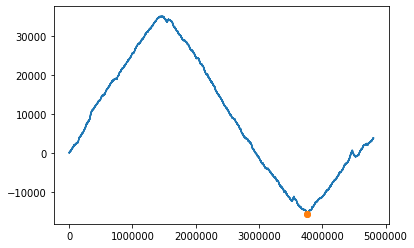

In [86]:
import matplotlib.pyplot as plt
plt.plot(range(len(num)), num,'-', mins, [num[x] for x in mins],  'o')

In [90]:
n = mins[1]
n

3764858

In [91]:
FrequentWordsWithMismatches_Reverse(Genome[n - 500: n + 500], 9, 1)

['TGTGGATAA', 'TTATCCACA']